In [1]:
# Dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# File path to Load the files
mouse_drug_data_path = "data/mouse_drug_data.csv"
clinical_trial_data_path = "data/clinicaltrial_data.csv"

In [3]:
# Read the Mouse drug data file
df_mouse_drug_data = pd.read_csv(mouse_drug_data_path)
df_mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
# Read the Clinical Trial Data file
df_clincial_trial_data = pd.read_csv(clinical_trial_data_path)
df_clincial_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
df_merged = pd.merge(df_clincial_trial_data, df_mouse_drug_data, on = ("Mouse ID"),how='outer')
# Display the data table for preview
df_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumour_response_group = df_merged.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
df_tumour = tumour_response_group ["Tumor Volume (mm3)"].mean().to_frame()

# Preview DataFrame
df_tumour.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumour_response_err = df_merged.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
df_tumour_response_error = tumour_response_err.to_frame()
# Preview DataFrame
df_tumour_response_error.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [8]:
# Minor Data Munging to Re-Format the Data Frames
df_tomour_plot = df_tumour.unstack(0)
# Preview that Reformatting worked
df_tomour_plot = df_tomour_plot["Tumor Volume (mm3)"]
df_tomour_plot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


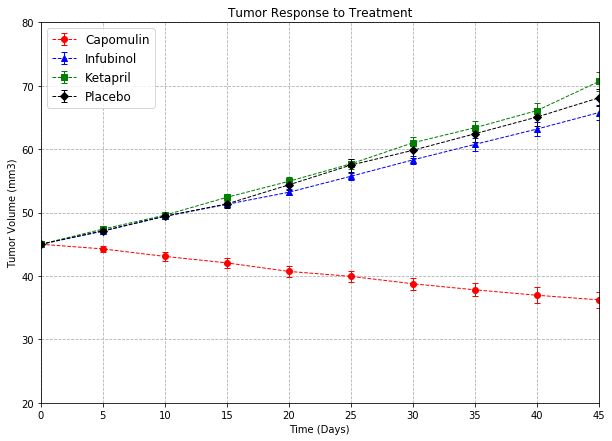

In [9]:
# Generate the Plot (with Error Bars)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)
x_limit = 45
plt.figure(figsize=(10,7))

# calculate the tumor volume for each drug specified and plot the corresponding values
error = df_tumour_response_error["Tumor Volume (mm3)"]["Capomulin"]
Capomulin = plt.errorbar(x_axis, df_tomour_plot["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, 
                         alpha=1, capsize=3,color ="red")

error = df_tumour_response_error["Tumor Volume (mm3)"]["Infubinol"]
Infubinol = plt.errorbar(x_axis, df_tomour_plot["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, 
                         alpha=1, capsize=3,color ="blue")

error = df_tumour_response_error["Tumor Volume (mm3)"]["Ketapril"]
Ketapril = plt.errorbar(x_axis, df_tomour_plot["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, 
                         alpha=1, capsize=3,color ="green")

error = df_tumour_response_error["Tumor Volume (mm3)"]["Placebo"]
Placebo = plt.errorbar(x_axis, df_tomour_plot["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, 
                         alpha=1, capsize=3,color ="black")

# Set the plot title and axes titles
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(linestyle="dashed")
plt.ylim(20, 80)
plt.xlim(0, 45)

plt.legend((Capomulin, Infubinol, Ketapril, Placebo), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)

# Save the Figure
plt.savefig("treatment.png")

# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatsic_response_group = df_merged.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
df_mean_sem_meta = metastatsic_response_group.agg({"Metastatic Sites" :["mean", "sem"]})

# Preview DataFrame
df_meta = df_mean_sem_meta["Metastatic Sites"]["mean"]
df_meta.head()


Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
Name: mean, dtype: float64

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
df_meta_error = df_mean_sem_meta ["Metastatic Sites"]["sem"]
# Preview DataFrame
df_meta_error.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
Name: sem, dtype: float64

In [12]:
# Minor Data Munging to Re-Format the Data Frames
df_meta_plot = df_meta.unstack(0)

# Preview that Reformatting worked
df_meta_plot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [13]:
# Create list of the meta site mean for each of the four drugs
cap_meta_mean_list = df_mean_sem_meta.loc['Capomulin'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
infu_meta_mean_list = df_mean_sem_meta.loc['Infubinol'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
keta_meta_mean_list = df_mean_sem_meta.loc['Ketapril'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
plac_meta_mean_list = df_mean_sem_meta.loc['Placebo'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()

In [14]:
# Create list of the metastatic site sems(errors) for each of the four drugs 
cap_error= df_mean_sem_meta.loc['Capomulin'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
infu_error = df_mean_sem_meta.loc['Infubinol'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
keta_error = df_mean_sem_meta.loc['Ketapril'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
plac_error = df_mean_sem_meta.loc['Placebo'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()

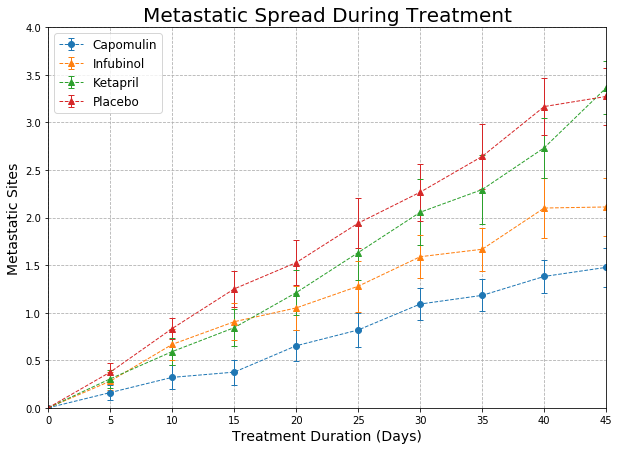

In [15]:
# Generate the Plot (with Error Bars)

plt.figure(figsize=(10,7))

# calculate the metasite mean value for each drug specified and plot the corresponding values
cap2 = plt.errorbar(x_axis, cap_meta_mean_list, yerr=cap_error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3)
infu2 = plt.errorbar(x_axis, infu_meta_mean_list, yerr=infu_error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3)
keta2 = plt.errorbar(x_axis, keta_meta_mean_list, yerr=keta_error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3)
plac2 = plt.errorbar(x_axis, plac_meta_mean_list, yerr=plac_error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3)

plt.ylim(0, 4)
plt.xlim(0, 45)

# Set the plot title and axes titles
plt.title("Metastatic Spread During Treatment", fontsize=20)
plt.xlabel("Treatment Duration (Days)", fontsize=14)
plt.ylabel("Metastatic Sites", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap2, infu2, keta2, plac2), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)

# Save the Figure
plt.savefig("spread.png")
        
# Show the resulting scatter plot
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_group = df_merged.groupby(["Drug", "Timepoint"])
mice_count = mice_count_group["Mouse ID"].nunique()

# Convert to DataFrame
df_mice = mice_count.to_frame()

# Preview DataFrame
df_mice.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [17]:
# Minor Data Munging to Re-Format the Data Frames
mice_plot = df_mice.unstack(0)

# Preview the Data Frame
df_mice_plot = mice_plot["Mouse ID"] 
df_mice_plot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


In [18]:
df_mice_plot["Capomulin"]

Timepoint
0     25
5     25
10    25
15    24
20    23
25    22
30    22
35    22
40    21
45    21
Name: Capomulin, dtype: int64

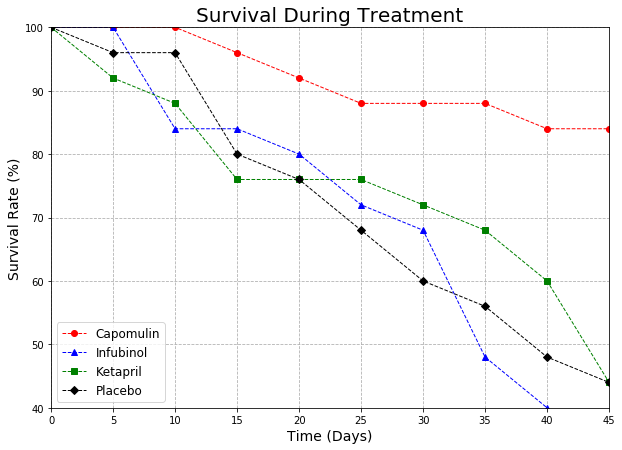

<Figure size 432x288 with 0 Axes>

In [19]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (10,7))

cap3 = plt.errorbar(x_axis, (df_mice_plot["Capomulin"]/(df_mice_plot["Capomulin"][0])*100), fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "red")
infu3 = plt.errorbar(x_axis, (df_mice_plot["Infubinol"]/(df_mice_plot["Infubinol"][0])*100), fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "blue")
keta3 = plt.errorbar(x_axis, (df_mice_plot["Ketapril"]/(df_mice_plot["Ketapril"][0])*100),  fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="green")
plac3 = plt.errorbar(x_axis, (df_mice_plot["Placebo"]/(df_mice_plot['Placebo'][0])*100),  fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="black")

# Set the plot title and axes titles

plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Survival Rate (%)", fontsize=14)
plt.ylim(40, 100)
plt.xlim(0, 45)

plt.grid(linestyle="dashed")
plt.legend((cap3, infu3, keta3, plac3), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

# Save the Figure
plt.savefig("survival.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug

## Calculating percent change in tumour volume for Capomulin
cap_list = df_tomour_plot["Capomulin"].to_list()
perc_change_cap = ((cap_list[-1] - cap_list[0])/cap_list[0])*100

## Calculating percent change in tumour volume for Infubinol
infu_list = df_tomour_plot["Infubinol"].to_list()
perc_change_infu = ((infu_list[-1] - infu_list[0])/infu_list[0])*100

## Calculating percent change for Ketapril
keta_list = df_tomour_plot["Ketapril"].to_list()
perc_change_keta = ((keta_list[-1] - keta_list[0])/keta_list[0])*100

## Calculating percent change for Placebo
plac_list = df_tomour_plot["Placebo"].to_list()
perc_change_plac = ((plac_list[-1] - plac_list[0])/plac_list[0])*100


In [21]:
# Display Percentage change in Capomulin
perc_change_cap

-19.475302667894155

In [22]:
# Display Percentage change in Infubinol
perc_change_infu

46.12347172785184

In [23]:
# Display Percentage change in Ketapril
perc_change_keta

57.02879468660604

In [24]:
# Display Percentage change in Placebo
perc_change_plac

51.29796048315153

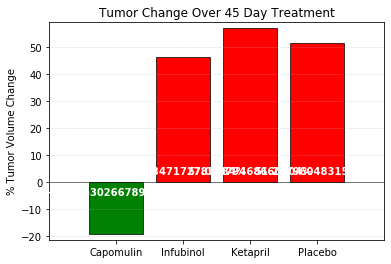

In [25]:
# Store all Relevant Percent Changes into a Tuple
y = [perc_change_cap, perc_change_infu, perc_change_keta, perc_change_plac]

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(len(y))

# Splice the data between passing and failing drugs
# Set the colors of the bars depending on if pos or neg
# -ve % are green and +ve % are red
colors = []
for item in y:
    if item < 0:
        colors.append('green')
    else:
        colors.append('red')


# Set up the bar graph 
tumor_growth_bar = plt.bar(x_axis, y, color=colors, alpha=1.0, edgecolor='black', linewidth=0.7)

# Set the plot title and axes titles
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

# Add labels, tick marks, etc. 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])

# Set the limit of the x and y axes. lim(start, end)
plt.xlim(-1, len(x_axis))
plt.ylim(min(y)-2, max(y)+2)

# Plot horizontal line at y=0
plt.hlines(0, -1, len(x_axis), alpha=1.0, linewidth=0.5)

# Add gridlines
plt.grid('on', which='major', axis='y', linestyle='dotted', linewidth=0.5)

# Use functions to label the percentages of changes
# Call functions to implement the function calls

def autolabel(rects):
    for i,rect in enumerate(rects):
        height = int(y[i])
        if height >= 0:
            plt.text(rect.get_x()+rect.get_width()/2., 2, '%s%%'% (y[i]),
                ha='center', va='bottom', color='white', weight='bold')
        else:
            plt.text(rect.get_x()+rect.get_width()/2., -2, '%s%%'% (y[i]),
                ha='center', va='top', color='white', weight='bold')          

autolabel(tumor_growth_bar)

# Save the Figure
plt.savefig("change.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)